In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import itertools

import seaborn as sns


In [6]:
df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [7]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [8]:
df= df[['LocationDesc','Class','Question','Data_Value','Sample_Size','Age','Education','Gender','Income','Race/Ethnicity','QuestionID','LocationID','StratificationCategory1','Stratification1']]
df.head()
df.describe()


,Data_Value,Sample_Size,LocationID
count,48346.000000,48346.00000,53392.000000
mean,31.156681,3889.19286,30.282215
std,10.247033,19829.42129,16.821318
min,0.900000,50.00000,1.000000
25%,24.100000,566.00000,17.000000
50%,30.700000,1209.00000,30.000000
75%,37.000000,2519.00000,44.000000
max,77.600000,476876.00000,78.000000


In [9]:
df.dtypes

LocationDesc                object
Class                       object
Question                    object
Data_Value                 float64
Sample_Size                float64
Age                         object
Education                   object
Gender                      object
Income                      object
Race/Ethnicity              object
QuestionID                  object
LocationID                   int64
StratificationCategory1     object
Stratification1             object
dtype: object

In [10]:
df = df.drop_duplicates()

In [11]:
df.Class.unique()

array(['Obesity / Weight Status', 'Fruits and Vegetables',
       'Physical Activity'], dtype=object)

array([[<AxesSubplot: title={'center': 'Data_Value'}>,
        <AxesSubplot: title={'center': 'Sample_Size'}>],
       [<AxesSubplot: title={'center': 'LocationID'}>, <AxesSubplot: >]],
      dtype=object)

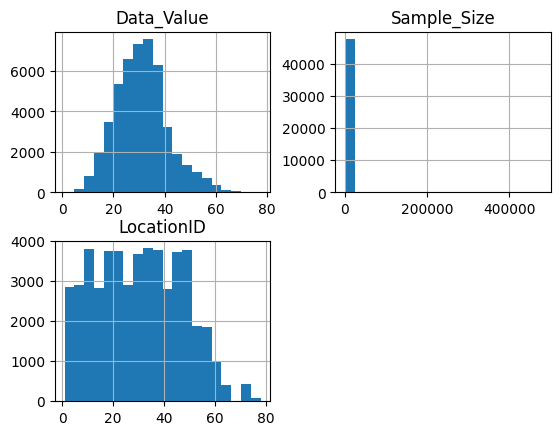

In [12]:
#plaot the data to see the distribution
df.hist( bins=20)



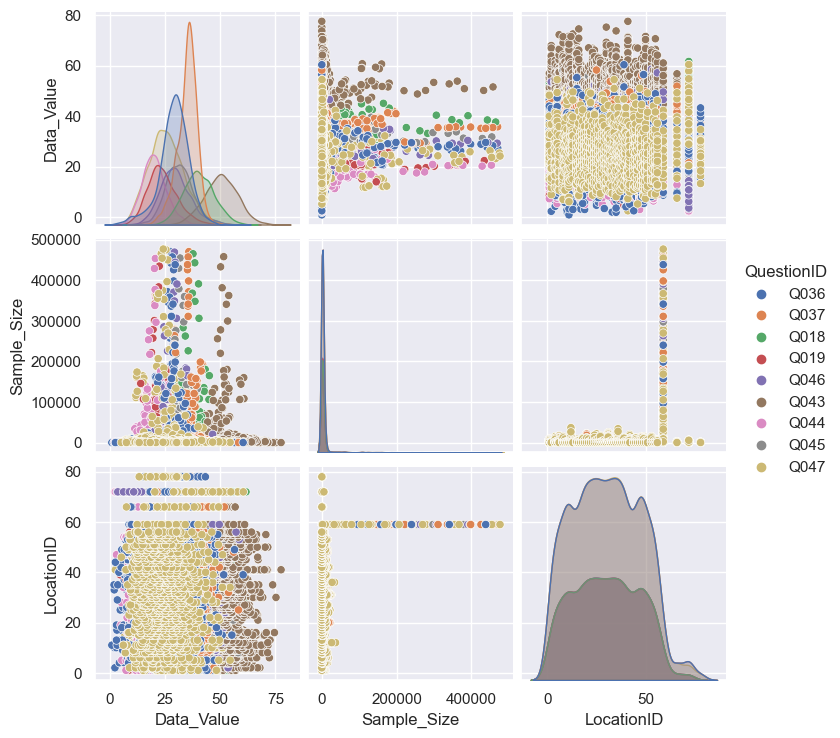

In [13]:
#sns pair plot to see the distribution of the data
sns.set_theme()
sns.pairplot(df, hue='QuestionID', height=2.5)


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

LocationDesc                   0
Class                          0
Question                       0
Data_Value                  1660
Sample_Size                 1660
Age                        38568
Education                  42378
Gender                     46192
Income                     36657
Race/Ethnicity             38136
QuestionID                     0
LocationID                     0
StratificationCategory1        0
Stratification1                0
dtype: int64

Lets now taka Age and play with it.

In [16]:
df= df.dropna(subset=['Data_Value'])
df.isnull().sum()

LocationDesc                   0
Class                          0
Question                       0
Data_Value                     0
Sample_Size                    0
Age                        36908
Education                  40718
Gender                     44532
Income                     34997
Race/Ethnicity             38136
QuestionID                     0
LocationID                     0
StratificationCategory1        0
Stratification1                0
dtype: int64

In [17]:
percentnull = df.isnull().sum()/df.shape[0]*100
print(percentnull)

LocationDesc                0.000000
Class                       0.000000
Question                    0.000000
Data_Value                  0.000000
Sample_Size                 0.000000
Age                        76.341373
Education                  84.222066
Gender                     92.111033
Income                     72.388615
Race/Ethnicity             78.881397
QuestionID                  0.000000
LocationID                  0.000000
StratificationCategory1     0.000000
Stratification1             0.000000
dtype: float64


Lets start with AGE

In [18]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Data_Value', 'Sample_Size', 'LocationID'], dtype='object')
Index(['LocationDesc', 'Class', 'Question', 'Age', 'Education', 'Gender',
       'Income', 'Race/Ethnicity', 'QuestionID', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')


In [19]:
#drop all row with StratificationCategory1 = Total
df = df[df.StratificationCategory1 != 'Total']

In [20]:
in_map = {'Less than $15,000':0, '$15,000 - $24,999':1, '$25,000 - $34,999':2,'$35,000 - $49,999':3, '$50,000 - $74,999':4, 
          '$75,000 or greater':5, 'Data not reported':6}

df['Income'] = df['Income'].map(in_map)
df['Income'].unique()

array([nan,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

In [21]:
ed_map = {'Less than high school': 0, 'High school graduate':1, 'Some college or technical school':2,'College graduate':3}

df['Education'] = df['Education'].map(ed_map)

df.head(5)

,LocationDesc,Class,Question,Data_Value,Sample_Size,Age,Education,Gender,Income,Race/Ethnicity,QuestionID,LocationID,StratificationCategory1,Stratification1
1,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN,Male,NaN,NaN,Q036,1,Gender,Male
2,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN,Female,NaN,NaN,Q036,1,Gender,Female
3,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,0.0,NaN,NaN,NaN,Q036,1,Education,Less than high school
4,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,1.0,NaN,NaN,NaN,Q036,1,Education,High school graduate
5,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,1925.0,NaN,2.0,NaN,NaN,NaN,Q036,1,Education,Some college or technical school


In [22]:
g_map = {'Male':0 , 'Female':1}

df['Gender']= df['Gender'].map(g_map)
df.head(5)

,LocationDesc,Class,Question,Data_Value,Sample_Size,Age,Education,Gender,Income,Race/Ethnicity,QuestionID,LocationID,StratificationCategory1,Stratification1
1,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN,0.0,NaN,NaN,Q036,1,Gender,Male
2,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN,1.0,NaN,NaN,Q036,1,Gender,Female
3,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,0.0,NaN,NaN,NaN,Q036,1,Education,Less than high school
4,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,1.0,NaN,NaN,NaN,Q036,1,Education,High school graduate
5,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,1925.0,NaN,2.0,NaN,NaN,NaN,Q036,1,Education,Some college or technical school


In [23]:
age_map = {'18 - 24':0 ,'25 - 34':1, '35 - 44':2, '45 - 54':3, '55 - 64':4, '65 or older':5 }

df['Age']= df['Age'].map(age_map)
df.head(5)

,LocationDesc,Class,Question,Data_Value,Sample_Size,Age,Education,Gender,Income,Race/Ethnicity,QuestionID,LocationID,StratificationCategory1,Stratification1
1,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN,0.0,NaN,NaN,Q036,1,Gender,Male
2,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN,1.0,NaN,NaN,Q036,1,Gender,Female
3,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,0.0,NaN,NaN,NaN,Q036,1,Education,Less than high school
4,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,1.0,NaN,NaN,NaN,Q036,1,Education,High school graduate
5,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,1925.0,NaN,2.0,NaN,NaN,NaN,Q036,1,Education,Some college or technical school


In [24]:
df.dtypes

LocationDesc                object
Class                       object
Question                    object
Data_Value                 float64
Sample_Size                float64
Age                        float64
Education                  float64
Gender                     float64
Income                     float64
Race/Ethnicity              object
QuestionID                  object
LocationID                   int64
StratificationCategory1     object
Stratification1             object
dtype: object

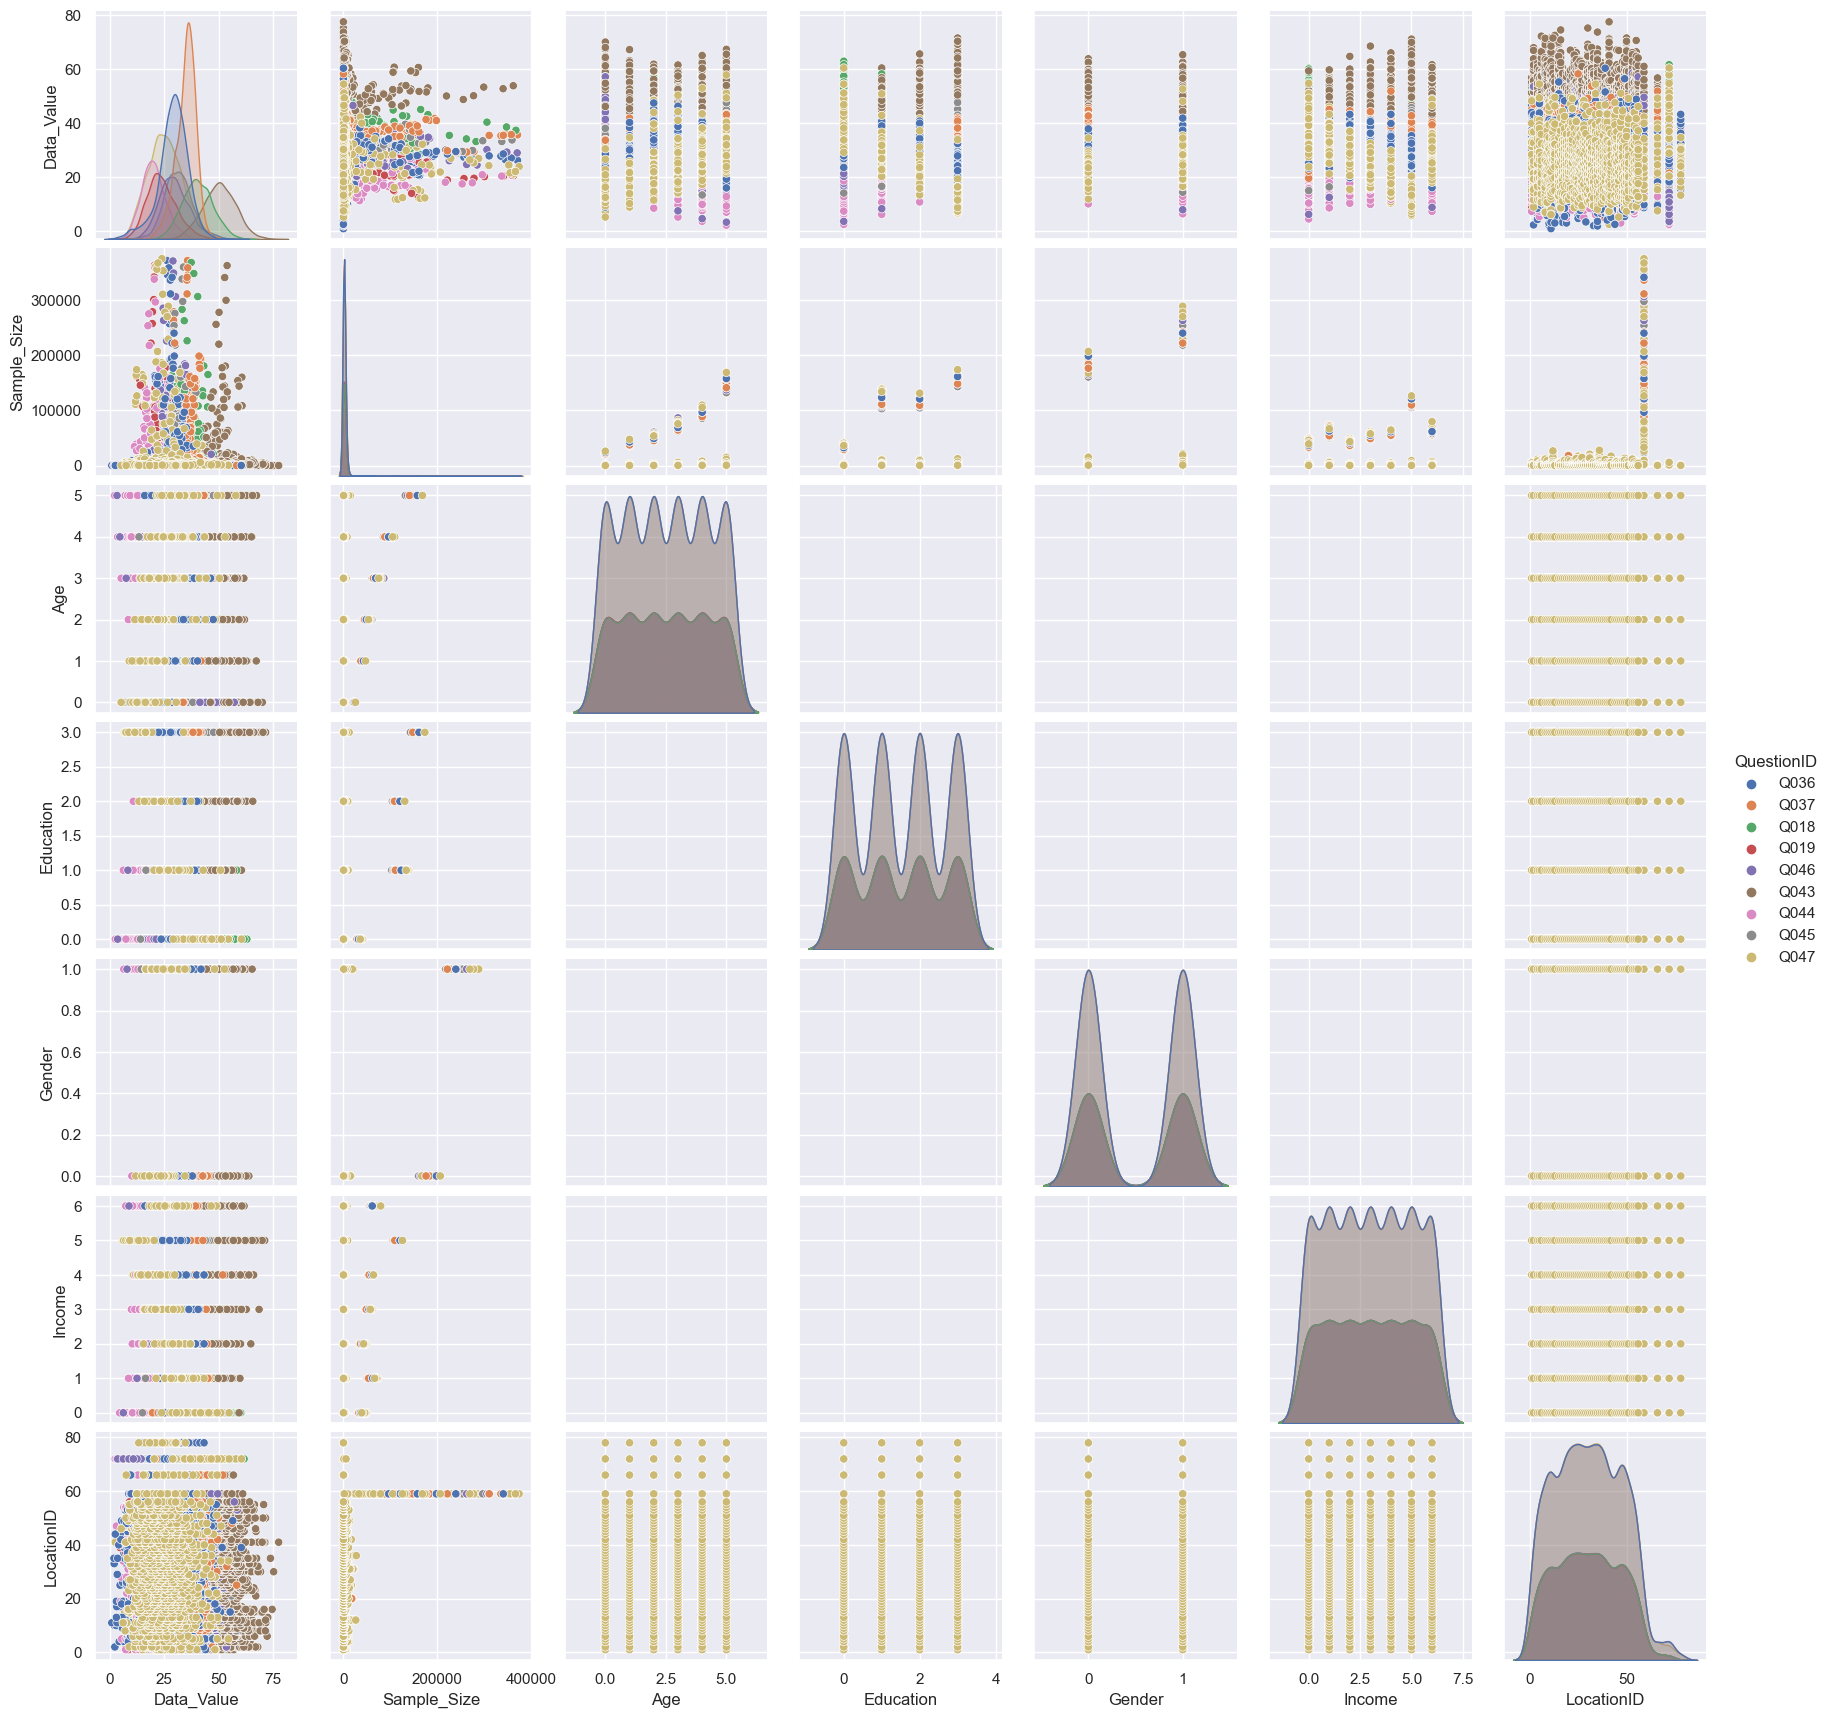

In [25]:
sns.pairplot(df, hue='QuestionID', height=2.5)

Lets start with AGE data and Data_value on Obesity


<AxesSubplot: >

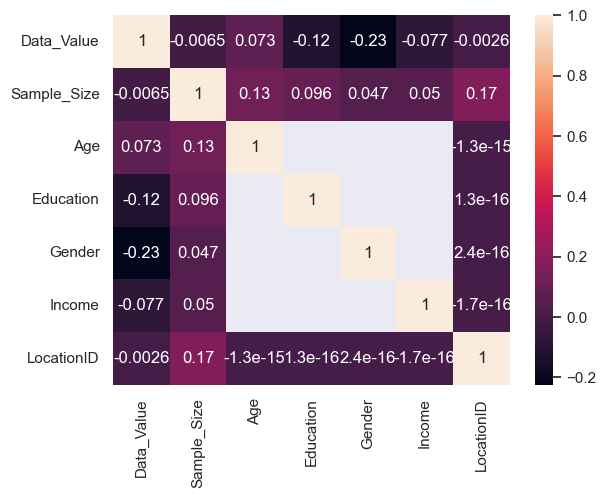

In [26]:
corr = df.corr()

sns.heatmap(corr, annot=True)

In [27]:
x= df[['Age','LocationID','Data_Value']]



In [28]:
#drop all na values from x
x = x.dropna()
y= x['Data_Value']
x= x[['Age','LocationID']]



In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [31]:
model.score(x_test, y_test)

-0.0026986952881202786

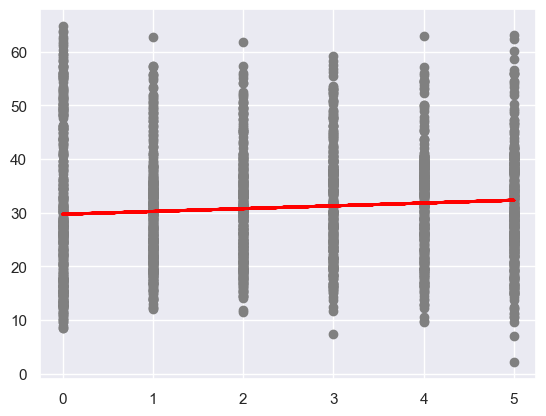

In [32]:
plt.scatter(x_test['Age'], y_test,  color='gray')
plt.plot(x_test['Age'], y_pred, color='red', linewidth=2)
plt.show()

Now lets go with Education


In [33]:
x= df[['Education','LocationID','Data_Value']]
x = x.dropna()
y= x['Data_Value']
x= x[['Education','LocationID']]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [35]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [36]:
model.score(x_test, y_test)

0.00756753227482454

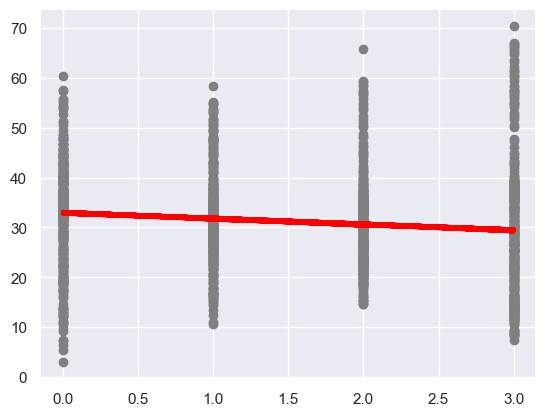

In [37]:
plt.scatter(x_test['Education'], y_test,  color='gray')
plt.plot(x_test['Education'], y_pred, color='red', linewidth=2)
plt.show()

Now we will go with Income

In [38]:
x= df[['Income','LocationID','Data_Value']]
x = x.dropna()
y= x['Data_Value']
x= x[['Income','LocationID']]


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [40]:
model = LinearRegression()  
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [41]:
model.score(x_test, y_test)

0.004162393911231965

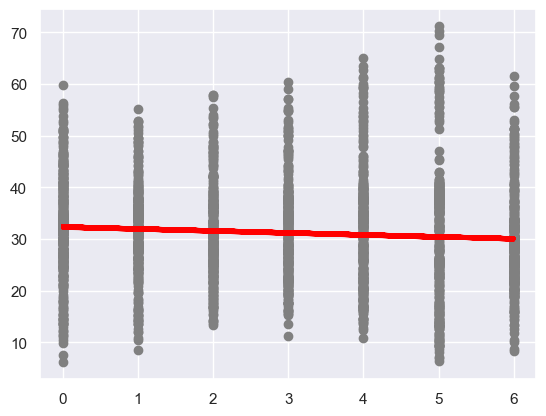

In [48]:
#plot the regression line with the data
plt.scatter(x_test['Income'], y_test,  color='gray')
plt.plot(x_test['Income'], y_pred, color='red', linewidth=2)
plt.show()


Now lets try question wise


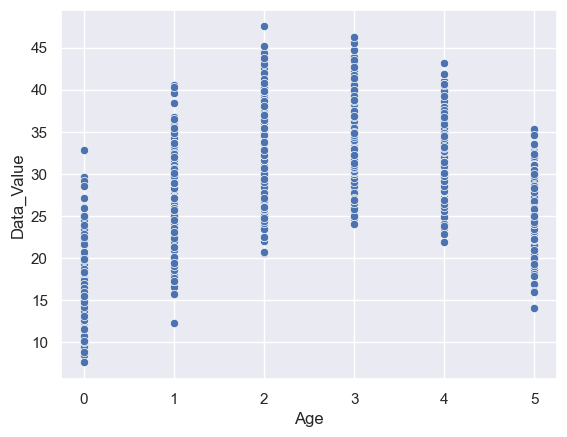

In [106]:
df1 = df[df['QuestionID'] == 'Q036']

sns.scatterplot(x="Age", y="Data_Value", data=df1)
plt.show()


In [84]:
df1 = df[['Age','Data_Value']]
df1 = df1.dropna()

df1.dtypes
df1 =  df1.astype('int64')
df1.dtypes


Age           int64
Data_Value    int64
dtype: object

In [91]:
y= df1['Age']
x= df1[['Data_Value']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [104]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train) 



SVC(kernel='poly')

In [102]:
y_pred = clf.predict(x_test)


In [103]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.45      0.22       404
           1       0.00      0.00      0.00       397
           2       0.16      0.25      0.19       375
           3       0.00      0.00      0.00       364
           4       0.13      0.16      0.14       359
           5       0.00      0.00      0.00       389

    accuracy                           0.15      2288
   macro avg       0.07      0.14      0.09      2288
weighted avg       0.07      0.15      0.09      2288



C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
